In [6]:
import numpy as np
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import os
import glob
from pathlib import Path
import seaborn as sns

kaplan_plots = True
cox_analysis = False

date_time_str = '20230622_002127'
data_path = Path(os.getcwd())

if kaplan_plots:
    kmf = KaplanMeierFitter()

    csv_files = glob.glob(os.path.join(data_path, f"outputs/{date_time_str}/*.csv"))

    if not os.path.exists(f"imgs/{date_time_str}"):
        os.makedirs(f"imgs/{date_time_str}")

    # Group runs by experiment
    grouped_files = {}
    for file in csv_files:
        file_name = os.path.basename(file)
        name_without_suffix = file_name.rsplit("-", 1)[0]
        suffix = file_name.rsplit("-", 1)[1]
        group_key = name_without_suffix

        if group_key not in grouped_files:
            grouped_files[group_key] = []

        grouped_files[group_key].append(file)


    kmfs = {}
    cphs = {}

    # Print the grouped file paths
    for group_key, files in grouped_files.items():
        fig = plt.figure()
        # For computing the mean
        surv_func_ci = pd.DataFrame()
        amt_of_runs = len(files)
        
        mean_survival_plots = pd.DataFrame(columns=list("TE"))
        CPH_data = pd.DataFrame()

        for i, file_path in enumerate(files):
            data_for_CPH = pd.read_csv(file_path)
            
            datakf = data_for_CPH[list('TE')]
            
            mean_survival_plots = pd.concat([mean_survival_plots, datakf])
            CPH_data = pd.concat([CPH_data, data_for_CPH])

        kmf = KaplanMeierFitter(label=group_key)
        cphs[group_key] = CPH_data

        kmfs[group_key] = kmf.fit(mean_survival_plots["T"], mean_survival_plots['E']) # Deze line geeft die warnings, maar kon het niet oplossen nog
        kmf.plot(label='Mean')

        plt.suptitle("Kaplan-Meier survival graph", fontsize=18)
        plt.title(group_key, fontsize=10)
        plt.xlabel("Time steps")
        plt.ylabel("Survival probability")
        plt.legend()

        plt.savefig(f"imgs/{date_time_str}/km-{group_key}.png")
        plt.close()

In [7]:
# All combinations image A (for Appendix)
fig = plt.figure(figsize=(10, 10))

legend_ax = fig.add_subplot(111, frameon=False)
legend_ax.axis('off')

nr_agents = [50, 100] # [50, 100, 200, 300]
dists = ['Sides', 'Uniform', 'RandomGrid']
probs = [0.5, 0.8, 1]
i=0

for nr_agent in nr_agents:
    for dist in dists:
        for prob in probs:
            i+=1

            if i == 1:
                ax = plt.subplot(6, 3, i)
            else:
                ax = plt.subplot(6, 3, i, sharex=ax, sharey=ax)

            if dist == 'RandomGrid':
                dist_name = 'Random Blobs'
            else:
                dist_name = dist
            plt.title(f'{dist_name}, nr_agents = {nr_agent}, prob. = {prob}', fontsize=10)
            ax = kmfs[f'Baseline-no_trade-{dist}-{nr_agent}-{prob}'].plot(label='Non-trading', legend=None, linewidth=1)
            ax.xaxis.set_label_text('')
            ax = kmfs[f'Baseline-random-{dist}-{nr_agent}-{prob}'].plot(label='Random-trading', legend=None, linewidth=1)
            ax.xaxis.set_label_text('')
            ax = kmfs[f'Baseline-pathfind_neighbor-{dist}-{nr_agent}-{prob}'].plot(label='Neighbor-trading', legend=None, linewidth=1)
            ax.xaxis.set_label_text('')
            ax = kmfs[f'Market-pathfind_market-{dist}-{nr_agent}-{prob}'].plot(label='Market-trading', legend=None, linewidth=1)
            ax.xaxis.set_label_text('')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(handles), bbox_to_anchor=(0.5, 0.94), fontsize=12)
fig.tight_layout(rect=(0.03, 0.03, 1, 0.9))
plt.subplots_adjust(wspace=0.3)
fig.text(0.5, 0.03, 'Time steps', ha='center', va='center', fontsize=14)
fig.text(0.03,  0.5, 'Survival probability', ha='center', va='center', rotation='vertical', fontsize=14)
plt.suptitle("Kaplan-Meier survival graphs (A)", fontsize=20, y=0.98)
plt.savefig(f"imgs/{date_time_str}/kms-comparison-market-uber-A.pdf")
plt.close()


# All combinations image B (for Appendix)
fig = plt.figure(figsize=(10, 10))

legend_ax = fig.add_subplot(111, frameon=False)
legend_ax.axis('off')

nr_agents = [200, 300] # [50, 100, 200, 300]
dists = ['Sides', 'Uniform', 'RandomGrid']
probs = [0.5, 0.8, 1]
i=0

for nr_agent in nr_agents:
    for dist in dists:
        for prob in probs:
            i+=1

            if i == 1:
                ax = plt.subplot(6, 3, i)
            else:
                ax = plt.subplot(6, 3, i, sharex=ax, sharey=ax)
            
            if dist == 'RandomGrid':
                dist_name = 'Random Blobs'
            else:
                dist_name = dist
            plt.title(f'{dist_name}, nr_agents = {nr_agent}, prob. = {prob}', fontsize=10)
            ax = kmfs[f'Baseline-no_trade-{dist}-{nr_agent}-{prob}'].plot(label='Non-trading', legend=None, linewidth=1)
            ax.xaxis.set_label_text('')
            ax = kmfs[f'Baseline-random-{dist}-{nr_agent}-{prob}'].plot(label='Random-trading', legend=None, linewidth=1)
            ax.xaxis.set_label_text('')
            ax = kmfs[f'Baseline-pathfind_neighbor-{dist}-{nr_agent}-{prob}'].plot(label='Neighbor-trading', legend=None, linewidth=1)
            ax.xaxis.set_label_text('')
            ax = kmfs[f'Market-pathfind_market-{dist}-{nr_agent}-{prob}'].plot(label='Market-trading', legend=None, linewidth=1)
            ax.xaxis.set_label_text('')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(handles), bbox_to_anchor=(0.5, 0.94), fontsize=12)
fig.tight_layout(rect=(0.03, 0.03, 1, 0.9))
plt.subplots_adjust(wspace=0.3)
fig.text(0.5, 0.03, 'Time steps', ha='center', va='center', fontsize=14)
fig.text(0.03,  0.5, 'Survival probability', ha='center', va='center', rotation='vertical', fontsize=14)
plt.suptitle("Kaplan-Meier survival graphs (B)", fontsize=20, y=0.98)
plt.savefig(f"imgs/{date_time_str}/kms-comparison-market-uber-B.pdf")
plt.close()

C:\Users\guido\AppData\Local\Temp\ipykernel_20892\220188696.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(6, 3, i)
C:\Users\guido\AppData\Local\Temp\ipykernel_20892\220188696.py:64: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(6, 3, i)


# CPH for BLobs

Index(['T', 'E', 'Scenario', 'Agent_type', 'Distribution', 'Num_agents',
       'Trading', 'Move_prob', 'Run_number'],
      dtype='object')
         T    E  Trade_random  Trade_search  Trade_market
0   1000.0  0.0             0             0             0
1   1000.0  0.0             0             0             0
2   1000.0  0.0             0             0             0
3   1000.0  0.0             0             0             0
4    292.0  1.0             0             0             0
..     ...  ...           ...           ...           ...
45   189.0  1.0             0             0             1
46   149.0  1.0             0             0             1
47   575.0  1.0             0             0             1
48  1000.0  0.0             0             0             1
49   280.0  1.0             0             0             1

[1000 rows x 5 columns]


<lifelines.CoxPHFitter: fitted with 1000 total observations, 620 right-censored observations>
             duration col = 'T'
                event col = 'E'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 380
   partial log-likelihood = -2402.79
         time fit was run = 2023-06-22 09:26:47 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
Trade_random  -0.68       0.51       0.13            -0.94            -0.42                 0.39                 0.66
Trade_search  -1.03       0.36       0.14            -1.31            -0.75                 0.27                 0.47
Trade_market   1.00       2.71       0.11             0.79             1.21                 2.20                 3.34

               cmp to     z      p   -log2(p)
covariate                                    
Trade_random     0.00 -5.11 <0.005      21.59
Trade_search     0.00 -7.29 <0.005      41.54
Trade_market     0.00  9.42 <0.005      67.62
---
Concordance = 0.50
Partial AIC = 4811.57
log-likelihood ratio test = 277.56 on 3 df
-log2(p) of ll-ratio test = 196.48

Summary dataframe:
                  coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                     
Trade_random -0.678844   0.507203  0.132766       -0.939061       -0.418628   
Trade_search -1.030151   0.356953  0.141343       -1.307178       -0.753125   
Trade_market  0.997584   2.711722  0.105875        0.790072        1.205095   

              exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                                  
Trade_random             0.390995             0.657949     0.0 -5.113087   
Trade_search             0.270583             0.470893     0.0 -7.288328   
Trade_market             2.203555             3.337078     0.0  9.422253   

                         p   -log2(p)  
covariate                              
Trade_random  3.169355e-07  21.589308  
Trade_search  3.138251e-13  41.535104  
Trade_market  4.415115e-21  67.618039  


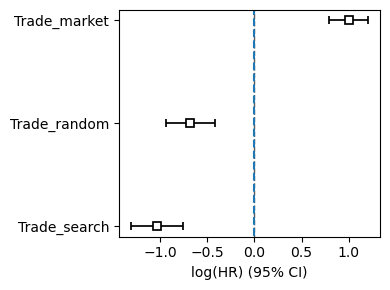

In [8]:
cox_analysis = True

if cox_analysis:
    combined_df = pd.concat([cphs['Baseline-no_trade-RandomGrid-50-0.8'],
                             cphs['Baseline-random-RandomGrid-50-0.8'],
                             cphs['Baseline-pathfind_neighbor-RandomGrid-50-0.8'],
                             cphs['Market-pathfind_market-RandomGrid-50-0.8'],
    ])

    
    le = LabelEncoder()
    print(combined_df.keys())

    def update_trades(row):
        if row["Agent_type"] == 'no_trade':
            row["Trade_random"] = 0
            row["Trade_search"] = 0
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'random':
            row["Trade_random"] = 1
            row["Trade_search"] = 0
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'pathfind_neighbor':
            row["Trade_random"] = 0
            row["Trade_search"] = 1
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'pathfind_market':
            row["Trade_random"] = 0
            row["Trade_search"] = 0
            row["Trade_market"] = 1
        return row

    # Assuming you have a DataFrame named combined_df
    combined_df = combined_df.apply(update_trades, axis=1)
    
    combined_df["Scenario"] = le.fit_transform(combined_df["Scenario"])
    combined_df["Trading"] = le.fit_transform(combined_df["Trading"])
    combined_df["Distribution"] = le.fit_transform(combined_df["Distribution"])
    combined_df = combined_df.drop(["Run_number", 'Num_agents', 'Distribution', 'Move_prob', 'Trading', 'Agent_type', 'Scenario'], axis=1)

    print( combined_df)
    combined_df.to_csv(f"outputs/{date_time_str}_CPH-trading-RG-50-0.8-data.csv")

    cph = CoxPHFitter(penalizer=0.1)
    cph.fit(combined_df, "T", "E", show_progress=False)
    cph.print_summary()
    print("Summary dataframe:")
    cph_df = cph.summary
    print(cph_df)
    cph_df.to_csv(f"outputs/{date_time_str}_CPH-trading-RG-50-0.8-results.csv")

    plt.figure(figsize=(4, 3))
    cph.plot()
    plt.vlines(x=0, ymin=-1, ymax=6, color='#1f77b4', linestyles='--')
    plt.tight_layout()
    plt.show()

# CPH for Sides

Index(['T', 'E', 'Scenario', 'Agent_type', 'Distribution', 'Num_agents',
       'Trading', 'Move_prob', 'Run_number'],
      dtype='object')
        T    E  Trade_random  Trade_search  Trade_market
0   170.0  1.0             0             0             0
1   120.0  1.0             0             0             0
2   158.0  1.0             0             0             0
3   194.0  1.0             0             0             0
4   130.0  1.0             0             0             0
..    ...  ...           ...           ...           ...
45  178.0  1.0             0             0             1
46  170.0  1.0             0             0             1
47  205.0  1.0             0             0             1
48  279.0  1.0             0             0             1
49  242.0  1.0             0             0             1

[1000 rows x 5 columns]


<lifelines.CoxPHFitter: fitted with 1000 total observations, 4 right-censored observations>
             duration col = 'T'
                event col = 'E'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 996
   partial log-likelihood = -5854.97
         time fit was run = 2023-06-22 09:26:48 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
Trade_random  -0.28       0.76       0.08            -0.44            -0.11                 0.64                 0.89
Trade_search  -0.81       0.44       0.09            -0.98            -0.64                 0.37                 0.52
Trade_market  -0.66       0.51       0.08            -0.83            -0.50                 0.44                 0.61

               cmp to     z      p   -log2(p)
covariate                                    
Trade_random     0.00 -3.30 <0.005       9.99
Trade_search     0.00 -9.45 <0.005      67.93
Trade_market     0.00 -7.86 <0.005      47.92
---
Concordance = 0.50
Partial AIC = 11715.94
log-likelihood ratio test = 107.96 on 3 df
-log2(p) of ll-ratio test = 74.81

Summary dataframe:
                  coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                     
Trade_random -0.277246   0.757868  0.084124       -0.442126       -0.112365   
Trade_search -0.813317   0.443385  0.086111       -0.982091       -0.644543   
Trade_market -0.664841   0.514355  0.084554       -0.830563       -0.499119   

              exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                                  
Trade_random             0.642668             0.893718     0.0 -3.295666   
Trade_search             0.374527             0.524902     0.0 -9.445013   
Trade_market             0.435804             0.607065     0.0 -7.862942   

                         p   -log2(p)  
covariate                              
Trade_random  9.818870e-04   9.992155  
Trade_search  3.553613e-21  67.931203  
Trade_market  3.752145e-15  47.921206  


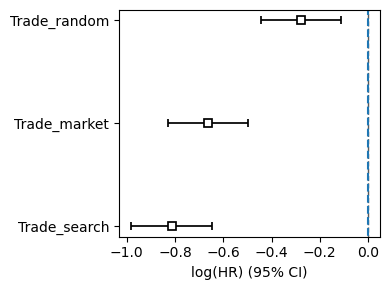

In [9]:
cox_analysis = True

if cox_analysis:
    combined_df = pd.concat([cphs[f'Baseline-no_trade-Sides-50-1'],
                             cphs[f'Baseline-random-Sides-50-1'],
                             cphs[f'Baseline-pathfind_neighbor-Sides-50-1'],
                             cphs[f'Market-pathfind_market-Sides-50-1'],
    ])

    
    le = LabelEncoder()
    print(combined_df.keys())

    def update_trades(row):
        if row["Agent_type"] == 'no_trade':
            row["Trade_random"] = 0
            row["Trade_search"] = 0
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'random':
            row["Trade_random"] = 1
            row["Trade_search"] = 0
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'pathfind_neighbor':
            row["Trade_random"] = 0
            row["Trade_search"] = 1
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'pathfind_market':
            row["Trade_random"] = 0
            row["Trade_search"] = 0
            row["Trade_market"] = 1
        return row

    # Assuming you have a DataFrame named combined_df
    combined_df = combined_df.apply(update_trades, axis=1)
    
    combined_df["Scenario"] = le.fit_transform(combined_df["Scenario"])
    combined_df["Trading"] = le.fit_transform(combined_df["Trading"])
    combined_df["Distribution"] = le.fit_transform(combined_df["Distribution"])
    combined_df = combined_df.drop(["Run_number", 'Num_agents', 'Distribution', 'Move_prob', 'Trading', 'Agent_type', 'Scenario'], axis=1)

    print( combined_df)
    combined_df.to_csv(f"outputs/{date_time_str}_CPH-trading-Sides-data.csv")

    cph = CoxPHFitter(penalizer=0.1)
    cph.fit(combined_df, "T", "E", show_progress=False)
    cph.print_summary()
    print("Summary dataframe:")
    cph_df = cph.summary
    print(cph_df)
    cph_df.to_csv(f"outputs/{date_time_str}_CPH-trading-Sides-results.csv")

    plt.figure(figsize=(4, 3))
    cph.plot()
    plt.vlines(x=0, ymin=-1, ymax=6, color='#1f77b4', linestyles='--')
    plt.tight_layout()
    plt.show()

# CPH Sides threshold of significance market (varying nr agents)

Index(['T', 'E', 'Scenario', 'Agent_type', 'Distribution', 'Num_agents',
       'Trading', 'Move_prob', 'Run_number'],
      dtype='object')


<lifelines.CoxPHFitter: fitted with 1000 total observations, 0 right-censored observations>
             duration col = 'T'
                event col = 'E'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 1000
   partial log-likelihood = -5856.14
         time fit was run = 2023-06-22 09:26:49 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
Trade_random   0.12       1.13       0.08            -0.04             0.28                 0.96                 1.32
Trade_search  -0.66       0.52       0.08            -0.83            -0.49                 0.44                 0.61
Trade_market  -0.56       0.57       0.08            -0.72            -0.39                 0.49                 0.68

               cmp to     z      p   -log2(p)
covariate                                    
Trade_random     0.00  1.42   0.16       2.69
Trade_search     0.00 -7.76 <0.005      46.76
Trade_market     0.00 -6.62 <0.005      34.73
---
Concordance = 0.50
Partial AIC = 11718.27
log-likelihood ratio test = 111.98 on 3 df
-log2(p) of ll-ratio test = 77.69

Index(['T', 'E', 'Scenario', 'Agent_type', 'Distribution', 'Num_agents',
       'Trading', 'Move_prob', 'Run_number'],
      dtype='object')


<lifelines.CoxPHFitter: fitted with 2000 total observations, 0 right-censored observations>
             duration col = 'T'
                event col = 'E'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 2000
number of events observed = 2000
   partial log-likelihood = -13115.35
         time fit was run = 2023-06-22 09:26:51 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
Trade_random  -0.11       0.90       0.06            -0.22             0.01                 0.80                 1.01
Trade_search  -0.62       0.54       0.06            -0.74            -0.50                 0.48                 0.61
Trade_market  -0.65       0.52       0.06            -0.77            -0.54                 0.46                 0.58

               cmp to      z      p   -log2(p)
covariate                                     
Trade_random     0.00  -1.87   0.06       4.02
Trade_search     0.00 -10.23 <0.005      79.17
Trade_market     0.00 -11.02 <0.005      91.38
---
Concordance = 0.50
Partial AIC = 26236.69
log-likelihood ratio test = 182.36 on 3 df
-log2(p) of ll-ratio test = 128.11

Index(['T', 'E', 'Scenario', 'Agent_type', 'Distribution', 'Num_agents',
       'Trading', 'Move_prob', 'Run_number'],
      dtype='object')


<lifelines.CoxPHFitter: fitted with 4000 total observations, 3 right-censored observations>
             duration col = 'T'
                event col = 'E'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 4000
number of events observed = 3997
   partial log-likelihood = -29007.34
         time fit was run = 2023-06-22 09:26:55 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
Trade_random  -0.19       0.83       0.04            -0.27            -0.11                 0.76                 0.90
Trade_search  -0.50       0.60       0.04            -0.59            -0.42                 0.56                 0.66
Trade_market  -0.73       0.48       0.04            -0.81            -0.65                 0.44                 0.52

               cmp to      z      p   -log2(p)
covariate                                     
Trade_random     0.00  -4.55 <0.005      17.48
Trade_search     0.00 -11.94 <0.005     106.72
Trade_market     0.00 -17.27 <0.005     219.67
---
Concordance = 0.50
Partial AIC = 58020.67
log-likelihood ratio test = 344.27 on 3 df
-log2(p) of ll-ratio test = 244.45

Index(['T', 'E', 'Scenario', 'Agent_type', 'Distribution', 'Num_agents',
       'Trading', 'Move_prob', 'Run_number'],
      dtype='object')


<lifelines.CoxPHFitter: fitted with 6000 total observations, 0 right-censored observations>
             duration col = 'T'
                event col = 'E'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 6000
number of events observed = 6000
   partial log-likelihood = -45935.31
         time fit was run = 2023-06-22 09:27:01 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
Trade_random  -0.19       0.82       0.03            -0.26            -0.13                 0.77                 0.88
Trade_search  -0.38       0.69       0.03            -0.44            -0.31                 0.64                 0.73
Trade_market  -0.77       0.47       0.03            -0.83            -0.70                 0.43                 0.50

               cmp to      z      p   -log2(p)
covariate                                     
Trade_random     0.00  -5.78 <0.005      26.98
Trade_search     0.00 -11.06 <0.005      92.06
Trade_market     0.00 -22.12 <0.005     357.85
---
Concordance = 0.50
Partial AIC = 91876.62
log-likelihood ratio test = 534.10 on 3 df
-log2(p) of ll-ratio test = 381.06

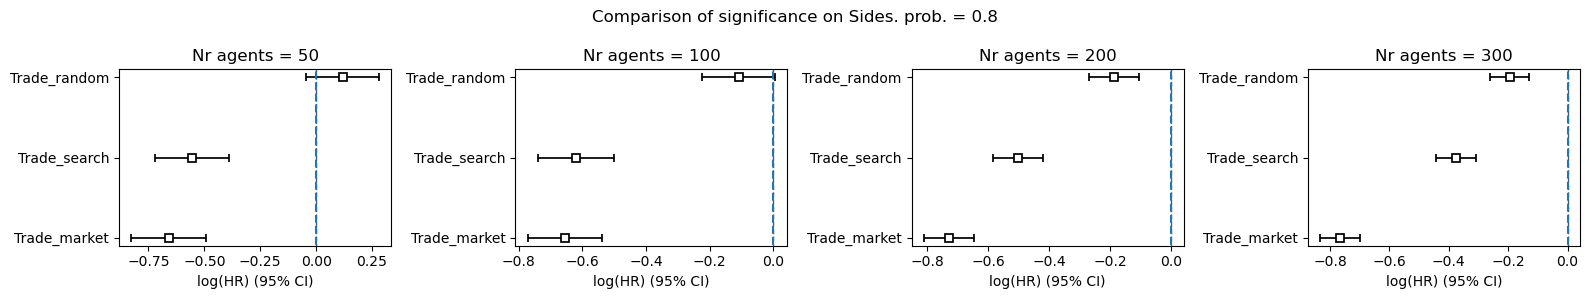

In [10]:
cox_analysis = True

nagentsss = [50, 100, 200, 300]

plt.figure(figsize=(16,3))

for i, n_agents in enumerate(nagentsss):
    if i > 0:
        ax = plt.subplot(1, 4, i+1, sharey=ax)
    else:
        ax = plt.subplot(1, 4, i+1)
    combined_df = pd.concat([cphs[f'Baseline-no_trade-Sides-{n_agents}-0.8'],
                             cphs[f'Baseline-random-Sides-{n_agents}-0.8'],
                             cphs[f'Baseline-pathfind_neighbor-Sides-{n_agents}-0.8'],
                             cphs[f'Market-pathfind_market-Sides-{n_agents}-0.8'],
    ])
    
    le = LabelEncoder()
    print(combined_df.keys())

    def update_trades(row):
        if row["Agent_type"] == 'no_trade':
            row["Trade_random"] = 0
            row["Trade_search"] = 0
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'random':
            row["Trade_random"] = 1
            row["Trade_search"] = 0
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'pathfind_neighbor':
            row["Trade_random"] = 0
            row["Trade_search"] = 1
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'pathfind_market':
            row["Trade_random"] = 0
            row["Trade_search"] = 0
            row["Trade_market"] = 1
        return row

    # Assuming you have a DataFrame named combined_df
    combined_df = combined_df.apply(update_trades, axis=1)
    
    combined_df["Scenario"] = le.fit_transform(combined_df["Scenario"])
    combined_df["Trading"] = le.fit_transform(combined_df["Trading"])
    combined_df["Distribution"] = le.fit_transform(combined_df["Distribution"])
    combined_df = combined_df.drop(["Run_number", 'Num_agents', 'Distribution', 'Move_prob', 'Trading', 'Agent_type', 'Scenario'], axis=1)

    combined_df.to_csv(f"outputs/{date_time_str}_CPH-trading-Sides-{n_agents}-data.csv")

    cph = CoxPHFitter(penalizer=0.1)
    cph.fit(combined_df, "T", "E", show_progress=False)
    cph_df.to_csv(f"outputs/{date_time_str}_CPH-trading-Sides-{n_agents}-results.csv")
    cph.print_summary()

    cph.plot()
    plt.title(f'Nr agents = {n_agents}')
    plt.vlines(x=0, ymin=-1, ymax=6, color='#1f77b4', linestyles='--')
    plt.tight_layout()
    plt.suptitle('Comparison of significance on Sides. prob. = 0.8')
    
plt.show()

# CPH for Uniform

Index(['T', 'E', 'Scenario', 'Agent_type', 'Distribution', 'Num_agents',
       'Trading', 'Move_prob', 'Run_number'],
      dtype='object')
          T    E  Trade_random  Trade_search  Trade_market
0     422.0  1.0             0             0             0
1     447.0  1.0             0             0             0
2     249.0  1.0             0             0             0
3    1000.0  0.0             0             0             0
4     521.0  1.0             0             0             0
..      ...  ...           ...           ...           ...
295   311.0  1.0             0             0             1
296   256.0  1.0             0             0             1
297   351.0  1.0             0             0             1
298   516.0  1.0             0             0             1
299   348.0  1.0             0             0             1

[6000 rows x 5 columns]

   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

The ``p_value_thre

<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 6000 total observations, 1398 right-censored observations>
         test_name = proportional_hazard_test

---
                   test_statistic      p  -log2(p)
Trade_market km              1.43   0.23      2.11
             rank            2.12   0.15      2.78
Trade_random km              3.20   0.07      3.76
             rank            3.36   0.07      3.90
Trade_search km              8.96 <0.005      8.51
             rank            9.90 <0.005      9.24



1. Variable 'Trade_search' failed the non-proportional test: p-value is 0.0017.

   Advice: with so few unique values (only 2), you can include `strata=['Trade_search', ...]` in the
call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



<lifelines.CoxPHFitter: fitted with 6000 total observations, 1398 right-censored observations>
             duration col = 'T'
                event col = 'E'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 6000
number of events observed = 4602
   partial log-likelihood = -37468.79
         time fit was run = 2023-06-22 09:27:07 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
Trade_random  -0.01       0.99       0.04            -0.08             0.06                 0.92                 1.06
Trade_search   0.01       1.01       0.04            -0.06             0.09                 0.94                 1.09
Trade_market   0.05       1.06       0.04            -0.02             0.13                 0.98                 1.13

               cmp to     z    p   -log2(p)
covariate                                  
Trade_random     0.00 -0.28 0.78       0.36
Trade_search     0.00  0.35 0.72       0.47
Trade_market     0.00  1.48 0.14       2.86
---
Concordance = 0.50
Partial AIC = 74943.58
log-likelihood ratio test = 3.19 on 3 df
-log2(p) of ll-ratio test = 1.46

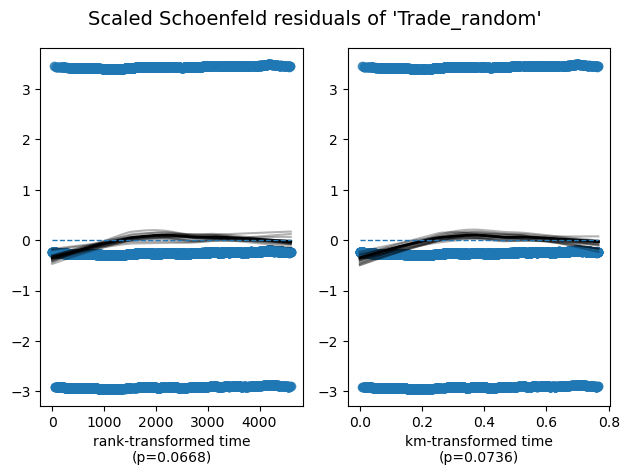

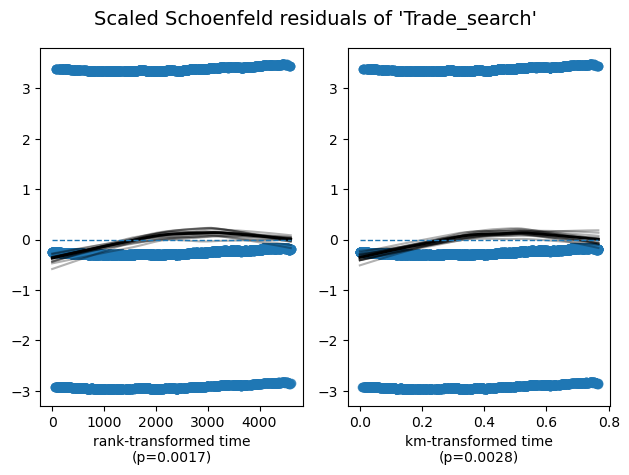

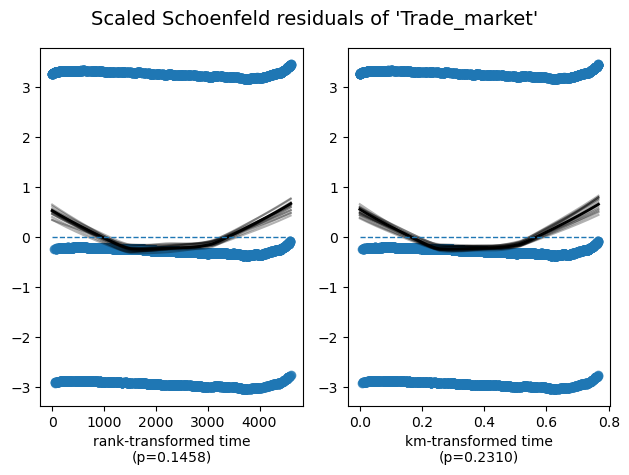

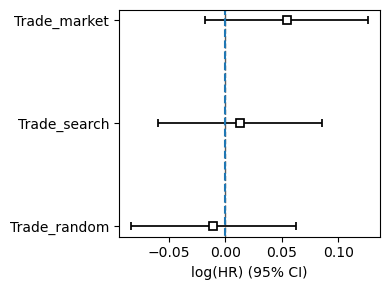

In [11]:
cox_analysis = True

if cox_analysis:
    combined_df = pd.concat([cphs[f'Baseline-no_trade-Uniform-300-0.8'],
                             cphs[f'Baseline-random-Uniform-300-0.8'],
                             cphs[f'Baseline-pathfind_neighbor-Uniform-300-0.8'],
                             cphs[f'Market-pathfind_market-Uniform-300-0.8'],
    ])

    
    le = LabelEncoder()
    print(combined_df.keys())

    def update_trades(row):
        if row["Agent_type"] == 'no_trade':
            row["Trade_random"] = 0
            row["Trade_search"] = 0
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'random':
            row["Trade_random"] = 1
            row["Trade_search"] = 0
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'pathfind_neighbor':
            row["Trade_random"] = 0
            row["Trade_search"] = 1
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'pathfind_market':
            row["Trade_random"] = 0
            row["Trade_search"] = 0
            row["Trade_market"] = 1
        return row

    # Assuming you have a DataFrame named combined_df
    combined_df = combined_df.apply(update_trades, axis=1)
    
    combined_df["Scenario"] = le.fit_transform(combined_df["Scenario"])
    combined_df["Trading"] = le.fit_transform(combined_df["Trading"])
    combined_df["Distribution"] = le.fit_transform(combined_df["Distribution"])
    combined_df = combined_df.drop(["Run_number", 'Num_agents', 'Distribution', 'Move_prob', 'Trading', 'Agent_type', 'Scenario'], axis=1)

    print( combined_df)
    combined_df.to_csv(f"outputs/{date_time_str}_CPH-trading-Sides-data.csv")

    cph = CoxPHFitter(penalizer=0.1)
    cph.fit(combined_df, "T", "E", show_progress=False)
    cph.check_assumptions(combined_df.reset_index(drop=True), p_value_threshold=0.05, show_plots=True)


    cph.print_summary()
    cph_df = cph.summary
    cph_df.to_csv(f"outputs/{date_time_str}_CPH-trading-Sides-results.csv")

    plt.figure(figsize=(4, 3))
    cph.plot()
    plt.vlines(x=0, ymin=-1, ymax=6, color='#1f77b4', linestyles='--')
    plt.tight_layout()
    plt.show()

# CPH for all data

In [12]:
cox_analysis = True

if cox_analysis:
    # Analysis
    def concatAllRuns(data_path: Path):
        csv_files = glob.glob(os.path.join(data_path, f"outputs/{date_time_str}/*.csv"))
        combined_df = pd.concat([pd.read_csv(f) for f in csv_files])
        return combined_df
    
    date_time_str = '20230622_002127'
    data_path = Path(os.getcwd())
    combined_df = concatAllRuns(data_path)
    print(combined_df)
    
    le = LabelEncoder()
    print(combined_df.keys())

    def update_trades(row):
        if row["Agent_type"] == 'no_trade':
            row["Trade_random"] = 0
            row["Trade_search"] = 0
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'random':
            row["Trade_random"] = 1
            row["Trade_search"] = 0
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'pathfind_neighbor':
            row["Trade_random"] = 0
            row["Trade_search"] = 1
            row["Trade_market"] = 0
        elif row["Agent_type"] == 'pathfind_market':
            row["Trade_random"] = 0
            row["Trade_search"] = 0
            row["Trade_market"] = 1
        return row

    # Assuming you have a DataFrame named combined_df
    combined_df = combined_df.apply(update_trades, axis=1)
    
    combined_df["Scenario"] = le.fit_transform(combined_df["Scenario"])
    combined_df["Trading"] = le.fit_transform(combined_df["Trading"])
    combined_df["Distribution"] = le.fit_transform(combined_df["Distribution"])
    combined_df = combined_df.drop(["Run_number", 'Trading', 'Agent_type', 'Scenario'], axis=1)

    print( combined_df.tail())
    combined_df.to_csv(f"outputs/{date_time_str}_CPH-trading-RG-50-0.8-data.csv")

    cph = CoxPHFitter(penalizer=0.1)
    cph.fit(combined_df, "T", "E", show_progress=False)
    cph.print_summary()
    print("Summary dataframe:")
    cph_df = cph.summary
    print(cph_df)
    cph_df.to_csv(f"outputs/{date_time_str}_CPH-trading-results-all.csv")

         T    E  Scenario       Agent_type Distribution  Num_agents  Trading  \
0    538.0  1.0  Baseline         no_trade   RandomGrid         100    False   
1    327.0  1.0  Baseline         no_trade   RandomGrid         100    False   
2   1000.0  0.0  Baseline         no_trade   RandomGrid         100    False   
3    643.0  1.0  Baseline         no_trade   RandomGrid         100    False   
4    121.0  1.0  Baseline         no_trade   RandomGrid         100    False   
..     ...  ...       ...              ...          ...         ...      ...   
45  1000.0  0.0    Market  pathfind_market      Uniform          50     True   
46  1000.0  0.0    Market  pathfind_market      Uniform          50     True   
47  1000.0  0.0    Market  pathfind_market      Uniform          50     True   
48  1000.0  0.0    Market  pathfind_market      Uniform          50     True   
49  1000.0  0.0    Market  pathfind_market      Uniform          50     True   

    Move_prob  Run_number  
0         0

<lifelines.CoxPHFitter: fitted with 117000 total observations, 24023 right-censored observations>
             duration col = 'T'
                event col = 'E'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 117000
number of events observed = 92977
   partial log-likelihood = -1019127.33
         time fit was run = 2023-06-22 09:31:10 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
Distribution  -0.33       0.72       0.00            -0.34            -0.32                 0.72                 0.72
Num_agents     0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
Move_prob     -0.41       0.66       0.02            -0.44            -0.38                 0.64                 0.68
Trade_random  -0.17       0.84       0.01            -0.19            -0.16                 0.83                 0.85
Trade_search  -0.19       0.82       0.01            -0.21            -0.18                 0.81                 0.84
Trade_market   0.03       1.03       0.01             0.01             0.04                 1.01                 1.04

               cmp to      z      p   -log2(p)
covariate                                     
Distribution     0.00 -97.20 <0.005        inf
Num_agents       0.00 106.87 <0.005        inf
Move_prob        0.00 -27.43 <0.005     547.97
Trade_random     0.00 -20.75 <0.005     315.14
Trade_search     0.00 -23.31 <0.005     396.68
Trade_market     0.00   3.20 <0.005       9.53
---
Concordance = 0.50
Partial AIC = 2038266.65
log-likelihood ratio test = 21927.56 on 6 df
-log2(p) of ll-ratio test = inf

Summary dataframe:
                  coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                     
Distribution -0.328796   0.719790  0.003383       -0.335426       -0.322166   
Num_agents    0.004100   1.004109  0.000038        0.004025        0.004176   
Move_prob    -0.413856   0.661096  0.015086       -0.443424       -0.384288   
Trade_random -0.173266   0.840914  0.008352       -0.189636       -0.156896   
Trade_search -0.193821   0.823805  0.008316       -0.210121       -0.177521   
Trade_market  0.026245   1.026592  0.008189        0.010194        0.042296   

              exp(coef) lower 95%  exp(coef) upper 95%  cmp to           z  \
covariate                                                                    
Distribution             0.715034             0.724578     0.0  -97.198383   
Num_agents               1.004033             1.004184     0.0  106.869422   
Move_prob                0.641835   

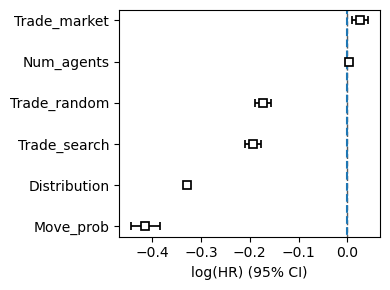

In [13]:
plt.figure(figsize=(4, 3))
cph.plot()
plt.vlines(x=0, ymin=-1, ymax=6, color='#1f77b4', linestyles='--')
plt.tight_layout()
plt.show()